In [61]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

#import openpyxl

#Constantes

E0 = 0
E1 = 1
E2 = 2

TENSAO = "tensao"
CORRENTE = "corrente"


#CARREGANDO OS DADOS EM DATAFRAMES

leitor = csv.reader(open("/home/torradeira-pinguim/Documentos/Inteligencia Artificial - Rafael Stubs Parpinelli/Implementacoes-IA/Trabalho_Final/docs/MotorUniversal_2k_5kHz_SemNorm.xlsx - TesteMotorUniversalAgoraVai2000.csv","r"),delimiter=",")
dados = list(leitor)
dados.pop(0)


dataExperimentList  : list[list[pd.DataFrame]]
dataExperimentList = [[],[],[]]


for experimento in dados:
    #exp = {'corrente':experimento[1:1001],'tensao':experimento[1001:2001]}
    df = pd.DataFrame()
    df.replace(",",".")
    #df['corrente'] = pd.to_numeric(df['corrente'], errors='coerce')
    #df['tensao'] = pd.to_numeric(df['tensao'], errors='coerce')
    df['corrente'] = pd.to_numeric([numero.replace(",",".") for numero in experimento[1:1001]], errors='coerce')
    df['tensao'] = pd.to_numeric([numero.replace(",",".") for numero in experimento[1001:2001]], errors='coerce')
    dataExperimentList[int(experimento[0])].append(df)

dataExperimentList[0][2]

,corrente,tensao
0,0.723090,24.456592
1,0.721113,24.184072
2,0.711632,23.755055
3,0.701274,23.280734
4,0.692945,22.764188
...,...,...
995,0.690400,22.179683
996,0.689801,21.903873
997,0.689337,21.712412
998,0.689055,21.651748


In [60]:
#VERIFICACAO: EXISTEM DADOS A SEREM TRATADOS?
dataExperimentList[0][7].isnull().values.any()

True

In [91]:
#QUAL É O COMPORTAMENTO DOS DADOS?
import random
random.seed()

#Funcao que define um conjunto aleatorio de 10 amostras, vou usar para demonstar os graficos
def congloramerado(estado:int, quantidade=10):
    r0  = [random.randint(0,len(dataExperimentList[estado])) for i in range(quantidade)]
    for i in range(quantidade):dataExperimentList[estado][r0[i]]["posicao"] = i
    dta = pd.concat([dataExperimentList[estado][r0[i]] for i in range(quantidade)])
    return dta

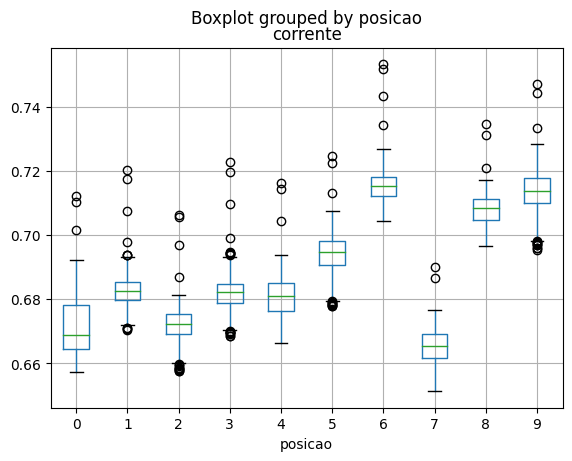

In [92]:
''' 
n_graphs = 11
r0  = [random.randint(0,len(dataExperimentList[0])) for i in range(n_graphs)]
for i in range(n_graphs):dataExperimentList[0][r0[i]]["posicao"]=i
data_big = [dataExperimentList[0][r0[i]] for i in range(n_graphs)]
dta = pd.concat(data_big)
'''
dta = congloramerado(E0,10)

dta.boxplot(by="posicao",column="corrente")


plt.show()

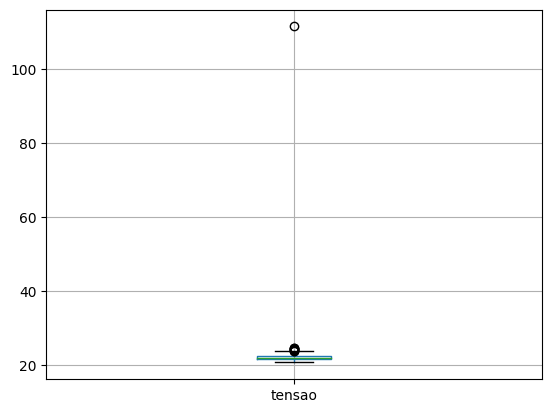

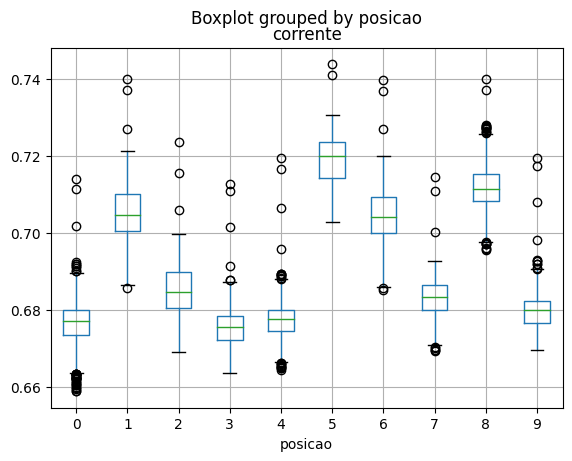

In [88]:
random.seed()
n_graphs = 10

r0  = [random.randint(0,len(dataExperimentList[0])) for i in range(n_graphs)]

for i in range(n_graphs):dataExperimentList[0][r0[i]]["posicao"]=i

data_big = [dataExperimentList[0][r0[i]] for i in range(n_graphs)]
dta = pd.concat(data_big)

dta.boxplot(by="posicao",column="corrente")
dta.plot.hist()


plt.show()